# RSML Tutorial in Python 

First, we activate matplotlib and qt in the Notebook

In [46]:
%matplotlib inline
%gui qt

In [47]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['../src'])

Python 3.13.11 | packaged by conda-forge | (main, Jan 26 2026, 23:57:06) [GCC 14.3.0] on linux


Then, we import main modules and function to work with RSML format in Python

In [48]:
import os
from pprint import pprint
from matplotlib import pyplot as plt
import openalea.rsml as rsml
from openalea.rsml.plot import multiple_plot
from openalea.rsml.data import data_dir
from openalea.rsml import measurements

Let first get the path to rsml files to work with.

In [49]:
arabido = data_dir/'AR570'
_generator = arabido.glob('*.rsml')
files = []
for f in _generator:
    files.append(os.path.normpath(f))
pprint(files)


['/home/bauget/Documents/Dev/rsml/src/openalea/rsml/data/AR570/2012_11_25_09h00_chl110_1_1.rsml',
 '/home/bauget/Documents/Dev/rsml/src/openalea/rsml/data/AR570/2012_11_19_18h00_chl110_1_1.rsml',
 '/home/bauget/Documents/Dev/rsml/src/openalea/rsml/data/AR570/2012_11_23_09h00_chl110_1_1.rsml',
 '/home/bauget/Documents/Dev/rsml/src/openalea/rsml/data/AR570/2012_11_24_09h00_chl110_1_1.rsml',
 '/home/bauget/Documents/Dev/rsml/src/openalea/rsml/data/AR570/2012_11_21_09h00_chl110_1_1.rsml',
 '/home/bauget/Documents/Dev/rsml/src/openalea/rsml/data/AR570/2012_11_20_08h30_chl110_1_1.rsml']


Plot the rsml architectures from these files

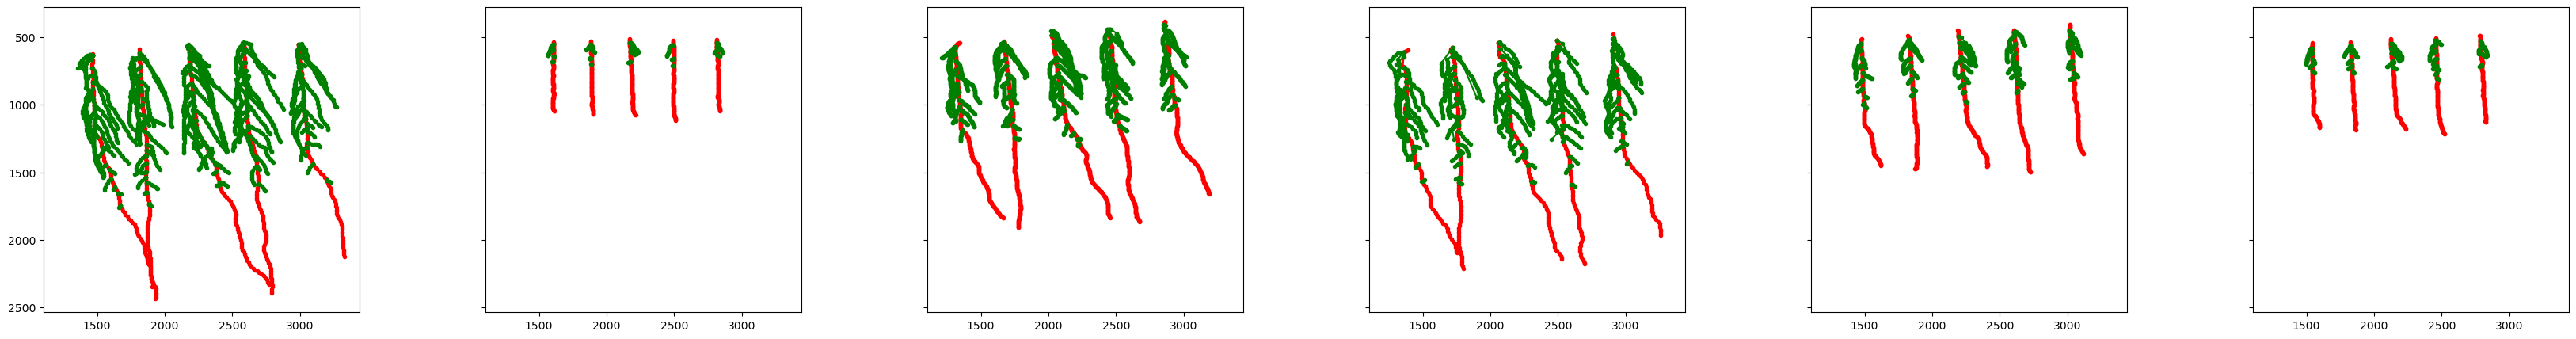

In [50]:
multiple_plot(files, image=False)

Plot the above rsml architectures over the corresponding images

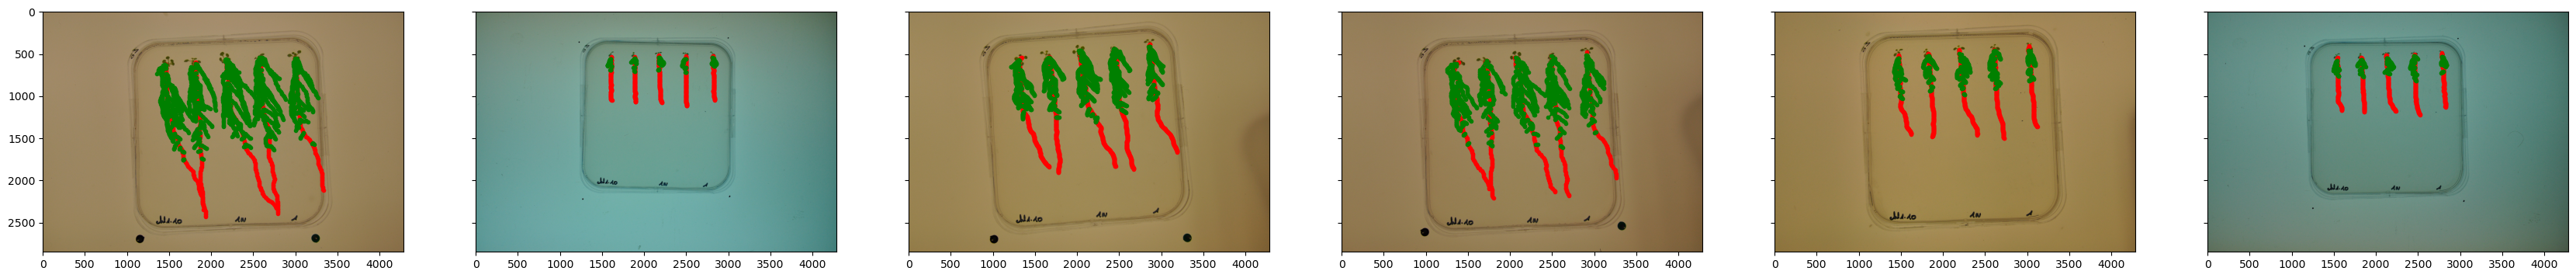

In [51]:
multiple_plot(files, image=True)

## Plotting the lateral lengths versus their porisiton the primary root

1. read and convert the 1st rsml file of the above list and convert it to MTG
2. get the id of the lateral roots with the root order, 1 for primary and 2 for 1st order lateral root

In [52]:
g = rsml.rsml2mtg(files[0]) # read and convert the 1st rsml file of the above list and convert it to MTG
root = measurements.root_order(g) # dictionary with order of the root 1 for the primary, 2 for the laterals in this case
lr = [r for r,o in root.items() if o==2] # list of ids of the lateral root

3. get the length of these laterals
4. get their position on the primary from the tip

In [53]:
length = measurements.root_length(g,lr)       # length of the lateral
ppos = measurements.parent_position(g,roots=lr,distance2tip=True)  # branching position on parent

5. plot length vs position, unit are pixels here for demo

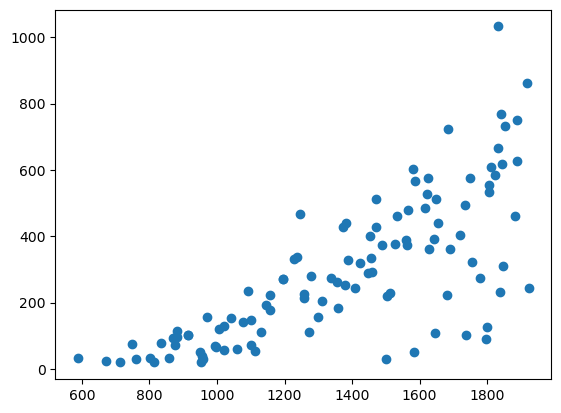

In [54]:
x = list(ppos.values()) # just convert dict to list
y = list(length.values())
plt.scatter(x,y)

Let do it over all the rsml files, just with a loop

- we use a python script `demo_plot_rsml.py` that can be found in `doc/example` directory

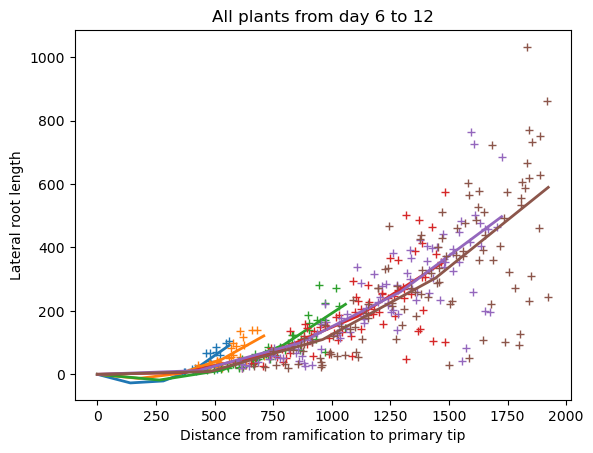

<Figure size 640x480 with 0 Axes>

In [55]:
%run demo_plot_rsml.py